## Chap 7. 서울시 구별 CCTV 설치 대비 범죄율 분석

**7.1 서울시 인구, CCTV 설치 및 번죄 데이터**

In [1]:
# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,586 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
# 2. [런타임] 메뉴에서 [런타임 다시 시작]을 선택한다.
# 3. matplotli의 폰트를 Nanum 포트로 지정한다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [2]:
# 필요한 라이브러리들을 임포트한다.
from google.colab import files
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터를 업로드하여 데이터프레임을 생성한다.
uploaded = files.upload()

CCTV = pd.read_excel(io.BytesIO(uploaded['seoul_cctv.xlsx']))

Saving seoul_cctv.xlsx to seoul_cctv (1).xlsx


In [4]:
CCTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [5]:
CCTV.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [6]:
CCTV.fillna(0, inplace=True)

In [7]:
CCTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  25 non-null     float64
 3   2012년     25 non-null     float64
 4   2013년     25 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [8]:
CCTV.rename(columns={CCTV.columns[0]: '구청별'}, inplace=True)
CCTV.head()

,구청별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [9]:
# 2016년을 포함한 이전 연도의 구별 합계를 열에 추가한다.
CCTV['2016년 이전'] = CCTV['2011년 이전'] + CCTV['2012년'] + CCTV['2013년'] + \
CCTV['2014년'] + CCTV['2015년'] + CCTV['2016년']

In [10]:
# 2016년을 포함한 이전 연도 열들을 삭제한다.
CCTV = CCTV.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년'], axis=1)

In [11]:
CCTV.head()

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
1,강 동 구,1879,273,385,1221.0
2,강 북 구,1265,1,319,945.0
3,강 서 구,1617,264,254,1099.0
4,관 악 구,3985,694,671,2620.0


In [12]:
# CCTV가 가장 많이 설치된 3개의 구를 확인한다.
# '소계' 열을 기준으로 내림차순 정렬해서 3개의 행을 확인한다.
CCTV.sort_values(by='소계', ascending=False).head(3)

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
4,관 악 구,3985,694,671,2620.0
6,구 로 구,3227,540,486,2201.0


**7.2 구별 CCTV 설치 및 인구 현황 분석**

In [13]:
# 데이터를 업로드하여 데이터프레임을 생성한다.
uploaded = files.upload()

POPU = pd.read_excel(io.BytesIO(uploaded['seoul_popu.xlsx']))

Saving seoul_popu.xlsx to seoul_popu (1).xlsx


In [14]:
POPU.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.4/4,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018.4/4,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018.4/4,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [15]:
# iloc(행인덱스, 열인덱스)을 이용해서 원하는 행, 열 데이터를 가져온다.
POPU = POPU.iloc[2:, [1, 3, 6, 9, 13]]

In [16]:
POPU.head()

,자치구,인구,인구.3,인구.6,65세이상고령자
2,합계,10049607,9765623,283984,1416131
3,종로구,163026,153065,9961,26742
4,중구,135633,125725,9908,22005
5,용산구,245090,228999,16091,37640
6,성동구,316463,308221,8242,42767


In [17]:
# 컬럼명을 의미있게 변경한다.
POPU.columns = pd.Index(['구청별', '총인구', '한국인', '외국인', '고령자'])
POPU.head()

,구청별,총인구,한국인,외국인,고령자
2,합계,10049607,9765623,283984,1416131
3,종로구,163026,153065,9961,26742
4,중구,135633,125725,9908,22005
5,용산구,245090,228999,16091,37640
6,성동구,316463,308221,8242,42767


In [18]:
# 인덱스를 재지정한다.
POPU.reset_index()

,index,구청별,총인구,한국인,외국인,고령자
0,2,합계,10049607,9765623,283984,1416131
1,3,종로구,163026,153065,9961,26742
2,4,중구,135633,125725,9908,22005
3,5,용산구,245090,228999,16091,37640
4,6,성동구,316463,308221,8242,42767
5,7,광진구,371063,355559,15504,45619
6,8,동대문구,364338,348052,16286,57165
7,9,중랑구,408147,403209,4938,61830
8,10,성북구,447687,435868,11819,67782
9,11,강북구,322915,319164,3751,58196


In [19]:
# 기존 인덱스를 삭제하고 리셋된 인덱스로 실제 데이터를 변경한다.
POPU.reset_index(drop=True, inplace=True)
POPU.head()

,구청별,총인구,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [20]:
# 분석에 필요하지 않은 첫 번째 행을 삭제한다.
POPU.drop(0, inplace=True)

In [21]:
POPU.head()

,구청별,총인구,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [22]:
# 인덱스를 재지정하는 또 다른 방법이다.
POPU.index = pd.Index(np.arange(0, 25, 1))
POPU.head()

,구청별,총인구,한국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619


In [23]:
# '외국인' 기준으로 내림차순 정렬한다.
POPU.sort_values(by='외국인', ascending=False).head(3)

,구청별,총인구,한국인,외국인,고령자
18,영등포구,403600,367778,35822,55673
16,구로구,438486,404497,33989,61801
17,금천구,254021,233917,20104,35739


In [24]:
# '고령자' 기준으로 내림차순 정렬한다.
POPU.sort_values(by='고령자', ascending=False).head(3)

,구청별,총인구,한국인,외국인,고령자
23,송파구,673507,666635,6872,81364
15,강서구,603611,596949,6662,79660
11,은평구,487666,483197,4469,77420


In [25]:
# 구청 별 열을 기준으로 POPU, CCTV 데이터프레임을 병합한다.
pd.merge(POPU, CCTV, on='구청별')

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
1,서대문구,323080,310313,12767,50456,2121,415,194,1512.0
2,영등포구,403600,367778,35822,55673,2495,371,793,1331.0


In [26]:
CCTV.head()

,구청별,소계,2017년,2018년,2016년 이전
0,강 남 구,5221,577,448,4196.0
1,강 동 구,1879,273,385,1221.0
2,강 북 구,1265,1,319,945.0
3,강 서 구,1617,264,254,1099.0
4,관 악 구,3985,694,671,2620.0


In [27]:
POPU.head()

,구청별,총인구,한국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619


In [28]:
# 공백 문자를 제거한다.
# \s+ 는 하나 이상의 공백을 나타내는 정규 표현식이다.
for df in (POPU, CCTV):
  df['구청별'] = df['구청별'].str.replace('\s+', '')

In [29]:
CCTV.head()

,구청별,소계,2017년,2018년,2016년 이전
0,강남구,5221,577,448,4196.0
1,강동구,1879,273,385,1221.0
2,강북구,1265,1,319,945.0
3,강서구,1617,264,254,1099.0
4,관악구,3985,694,671,2620.0


In [30]:
# 구청별 열을 기준으로 POPU, CCTV 를 병합하여 merged 데이터프레임을 만든다.
merged = pd.merge(POPU, CCTV, on='구청별')

In [31]:
merged

,구청별,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
0,종로구,163026,153065,9961,26742,1471,281,101,1089.0
1,중구,135633,125725,9908,22005,1544,317,328,899.0
2,용산구,245090,228999,16091,37640,2063,60,73,1930.0
3,성동구,316463,308221,8242,42767,2679,933,294,1452.0
4,광진구,371063,355559,15504,45619,1581,468,346,767.0
5,동대문구,364338,348052,16286,57165,2003,136,197,1670.0
6,중랑구,408147,403209,4938,61830,1068,66,9,993.0
7,성북구,447687,435868,11819,67782,3003,285,643,2075.0
8,강북구,322915,319164,3751,58196,1265,1,319,945.0
9,도봉구,341649,339413,2236,55964,858,117,71,670.0


In [32]:
# 기준이 되는 '구청별' 열을 인덱스로 처리해 다양한 분석을 할 수 있도록 한다.
merged.set_index('구청별', inplace=True)

In [33]:
merged.head()

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전
구청별,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0
중구,135633,125725,9908,22005,1544,317,328,899.0
용산구,245090,228999,16091,37640,2063,60,73,1930.0
성동구,316463,308221,8242,42767,2679,933,294,1452.0
광진구,371063,355559,15504,45619,1581,468,346,767.0


In [34]:
# 1인당 CCTV 설치 비율을 계산ㄴ하고 열을 추가한다.
merged['1인당CCTV비율'] = merged['소계']/merged['총인구']*100
merged.head()

,총인구,한국인,외국인,고령자,소계,2017년,2018년,2016년 이전,1인당CCTV비율
구청별,,,,,,,,,
종로구,163026,153065,9961,26742,1471,281,101,1089.0,0.90231
중구,135633,125725,9908,22005,1544,317,328,899.0,1.13837
용산구,245090,228999,16091,37640,2063,60,73,1930.0,0.841732
성동구,316463,308221,8242,42767,2679,933,294,1452.0,0.846544
광진구,371063,355559,15504,45619,1581,468,346,767.0,0.426073


In [35]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구        25 non-null     object 
 1   한국인        25 non-null     object 
 2   외국인        25 non-null     object 
 3   고령자        25 non-null     object 
 4   소계         25 non-null     int64  
 5   2017년      25 non-null     int64  
 6   2018년      25 non-null     int64  
 7   2016년 이전   25 non-null     float64
 8   1인당CCTV비율  25 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ KB


In [36]:
# to_numeric 은 숫자 유형에 따라 int와 float형으로 변환한다.
merged = merged.apply(pd.to_numeric)

In [37]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구        25 non-null     int64  
 1   한국인        25 non-null     int64  
 2   외국인        25 non-null     int64  
 3   고령자        25 non-null     int64  
 4   소계         25 non-null     int64  
 5   2017년      25 non-null     int64  
 6   2018년      25 non-null     int64  
 7   2016년 이전   25 non-null     float64
 8   1인당CCTV비율  25 non-null     float64
dtypes: float64(2), int64(7)
memory usage: 2.0+ KB


In [38]:
# 구별 '총인구'와 CCTV 설치대수인 '소계' 와의 상관계수를 구한다.
merged['총인구'].corr(merged['소계'], method='pearson')

0.37523206622060185

In [39]:
# 구별 '외국인'와 CCTV 설치대수인 '소계' 와의 상관계수를 구한다.
merged['외국인'].corr(merged['소계'], method='pearson')

0.18119377441191767

In [40]:
# 그래프를 그리기 위해 환경설정을 한다.
from matplotlib import rcParams

params = {'legend.fontsize': 14}
plt.rcParams.update(params)
plt.rcParams['axes.grid'] = True
plt.rc('grid', linestyle='--')
plt.grid(True)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.close('all')

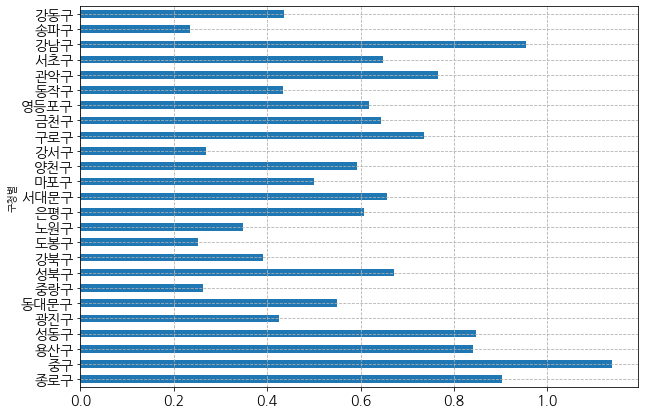

In [41]:
# 서울시 인구 1인당 CCTV 설치 비율을 구별로 나타내는 그래프를 그린다.
merged['1인당CCTV비율'].plot(kind='barh', figsize=(10, 7))
plt.show()

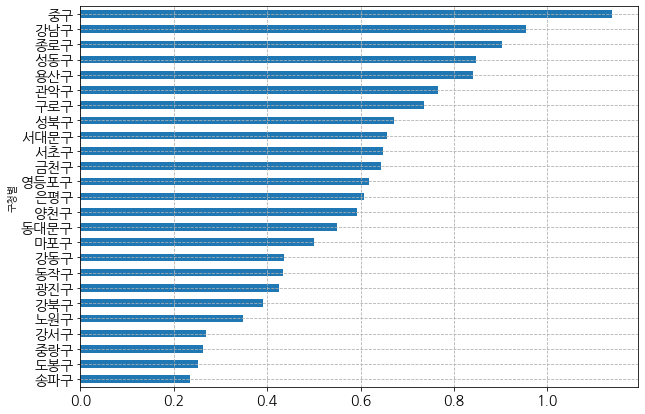

In [42]:
# 구별 1인당 CCTV 설치 비율을 알기 쉽도록 내림차순으로 정렬하여 수평 막대 그래프로 그린다.
merged['1인당CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 7))
plt.show()